In [1]:
# http://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# sklearn libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [5]:
df=pd.read_csv('D:/Machine Learning/dataset.csv')
df.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45


In [6]:
cl={'BHMBCCMKT01':1,'BHMBCCPST01':0,'BHMBCCSNH01':2,'BHMBCCTHL01':3,'BHMBRCBRG01':4,'BHMBRCBRG02':5,'BHMBRCBRG03':6,'BHMBRTARC01':7,'BHMEURBRD01':8,'BHMEURBRD02':9,'BHMMBMMBX01':10,'BHMNCPHST01':11,'BHMNCPLDH01':12,'BHMNCPNHS01':13,'BHMNCPNST01':14,'BHMNCPPLS01':15,'BHMNCPRAN01':16,'Broad Street':17,'Bull Ring':18,'NIA Car Parks':19,'NIA North':20,'NIA South':21,'Others-CCCPS105a':22,'Others-CCCPS119a':23,'Others-CCCPS133':24,'Others-CCCPS135a':25,'Others-CCCPS202':26,'Others-CCCPS8':27,'Others-CCCPS98':28,'Shopping':29}
df['SystemCodeNumber']=df['SystemCodeNumber'].map(cl)

In [7]:
df.isnull().any().sum()


0

In [8]:
X = df.drop(['Capacity','LastUpdated'], axis = 1).values
y = df['Capacity'].values

In [9]:
X

array([[   1,   61],
       [   1,   64],
       [   1,   80],
       ...,
       [  29, 1432],
       [  29, 1321],
       [  29, 1180]], dtype=int64)

In [10]:
y

array([ 577,  577,  577, ..., 1920, 1920, 1920], dtype=int64)

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
# Support Vector
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
p=obj.predict(xtest)
p

array([ 690, 1322,  788, ...,  577,  600,  450], dtype=int64)

In [14]:
accuracy_score(p,ytest)

0.9998600223964166

In [15]:
confusion_matrix(p,ytest)

array([[236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, 263,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0, 261,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 261,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 239,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  31,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [16]:
classification_report(p,ytest)

'              precision    recall  f1-score   support\n\n         220       1.00      1.00      1.00       236\n         317       1.00      1.00      1.00       263\n         387       1.00      1.00      1.00       261\n         450       1.00      1.00      1.00       261\n         470       1.00      1.00      1.00       239\n         480       1.00      1.00      1.00        31\n         485       1.00      1.00      1.00       275\n         496       1.00      1.00      1.00        17\n         500       1.00      1.00      1.00       195\n         577       1.00      1.00      1.00       244\n         600       1.00      1.00      1.00       228\n         687       1.00      1.00      1.00       255\n         690       1.00      1.00      1.00       285\n         720       1.00      1.00      1.00       258\n         788       1.00      1.00      1.00       248\n         849       1.00      1.00      1.00       263\n         863       1.00      1.00      1.00       246\n       

In [17]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(xtrain, ytrain)
Y_pred6= classifier6.predict(xtest)
print('Accuracy: ', accuracy_score(Y_pred6,ytest))

Accuracy:  1.0


In [18]:
##Using Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(xtrain, ytrain)
Y_pred1 = classifier1.predict(xtest)
print('Accuracy: ', accuracy_score(Y_pred1,ytest))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.5211366181410975


In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

In [20]:
#LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)
clf = LinearRegression()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7282296572353207

In [22]:
#for ridge regression
cross_val_score_ridge=[]
alpha=[]
for i in range(1,10):
    clf1 = Ridge(alpha= i * 0.25)
    clf1.fit(xtrain,ytrain)
    score =cross_val_score(clf1,X,y,cv=10)
    avg_score = np.mean(score)*10
    cross_val_score_ridge.append(avg_score)
    alpha.append(i*0.25)

for i in range(0,len(alpha)):
    print(str(alpha[i])+" : "+str(cross_val_score_ridge[i]))

0.25 : -71.93851790366763
0.5 : -71.93851195186893
0.75 : -71.93850600007283
1.0 : -71.93850004827952
1.25 : -71.93849409648885
1.5 : -71.93848814470095
1.75 : -71.9384821929157
2.0 : -71.93847624113317
2.25 : -71.93847028935336


In [23]:
#for lasso Regression
cross_val_score_lasso=[]
alpha1=[]
for i in range(1,10):
    clf2 = Lasso(alpha= i * 0.25)
    clf2.fit(xtrain,ytrain)
    score =cross_val_score(clf2,X,y,cv=10)
    avg_score = np.mean(score)*10
    cross_val_score_lasso.append(avg_score)
    alpha1.append(i*0.25)

for i in range(0,len(alpha1)):
    print(str(alpha1[i])+" : "+str(cross_val_score_lasso[i]))

0.25 : -71.93575845800522
0.5 : -71.93250703734455
0.75 : -71.9292559472494
1.0 : -71.92600518771994
1.25 : -71.92275475875604
1.5 : -71.91950466035773
1.75 : -71.91625489252502
2.0 : -71.91300545525796
2.25 : -71.90975634855654


In [24]:
#k-means clustering
from sklearn.cluster import KMeans as km
k=km(n_clusters=3,init='random',n_init=10,max_iter=300,random_state=0)
ykm=k.fit_predict(X)
center=k.cluster_centers_

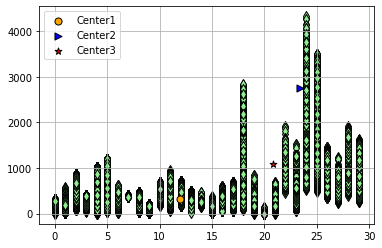

In [25]:
plt.figure()
plt.scatter(X[:,0],X[:,1],s=50,c='lightgreen',marker='d',edgecolor='black')
plt.scatter(center[0,0],center[0,1],s=50,c='orange',marker='o',edgecolor='black',label='Center1')
plt.scatter(center[1,0],center[1,1],s=50,c='blue',marker='>',edgecolor='black',label='Center2')
plt.scatter(center[2,0],center[2,1],s=50,c='red',marker='*',edgecolor='black',label='Center3')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [26]:
k.inertia_

2082812210.869564

In [ ]:
#kmeans++

distortions=[]
for i in range(2,11):
    k=km(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    k.fit(X)
    distortions.append(k.inertia_)
plt.plot(range(2,11),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Distortions')
plt.show()